<a href="https://colab.research.google.com/github/hibatallahk/DistFL/blob/main/FedAvg_Honest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import zscore                  

In [2]:
#Import all libraries
import matplotlib.pyplot as plt
import time
import os
import numpy as np
from numpy import asarray
import pandas as pd
import seaborn as sns   #visualization
sns.set(style="ticks", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import glob
import psutil
import csv
from itertools import repeat
from PIL import Image

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, GaussianNoise
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Convolution2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, History
from tensorflow.keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path1_15 = "/content/drive/MyDrive/leak_pipe/Leak 1_15m.npy"
path2_15 = "/content/drive/MyDrive/leak_pipe/Leak 2_15m.npy"
path3_15 = "/content/drive/MyDrive/leak_pipe/Leak 3_15m.npy"
######################################################
path1_30 = "/content/drive/MyDrive/leak_pipe/Leak 1_30m.npy"
path2_30 = "/content/drive/MyDrive/leak_pipe/Leak 2_30m.npy"
path3_30 = "/content/drive/MyDrive/leak_pipe/Leak 3_30m.npy"
#######################################################
path1_50 = "/content/drive/MyDrive/leak_pipe/Leak 1_50m.npy"
path2_50 = "/content/drive/MyDrive/leak_pipe/Leak 2_50m.npy"
path3_50 = "/content/drive/MyDrive/leak_pipe/Leak 3_50m.npy"

array1_15 = np.load(path1_15)
array2_15 = np.load(path2_15)
array3_15 = np.load(path3_15)
########################
array1_30 = np.load(path1_30)
array2_30 = np.load(path2_30)
array3_30 = np.load(path3_30)
########################
array1_50 = np.load(path1_50)
array2_50 = np.load(path2_50)
array3_50 = np.load(path3_50)

data1_15 = pd.DataFrame(array1_15)
data2_15 = pd.DataFrame(array2_15)
data3_15 = pd.DataFrame(array3_15)
#################################
data1_30 = pd.DataFrame(array1_30)
data2_30 = pd.DataFrame(array2_30)
data3_30 = pd.DataFrame(array3_30)
#################################
data1_50 = pd.DataFrame(array1_50)
data2_50 = pd.DataFrame(array2_50)
data3_50 = pd.DataFrame(array3_50)

data1_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_15.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
######################################################
data1_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_30.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
#######################################################
data1_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data2_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)
data3_50.set_axis(['P1', 'Q1', 'P2', 'Q2'], axis='columns', inplace=True)

data1_15['leak'] = 0.12
data1_30['leak'] = 0.31
data1_50['leak'] = 0.65
######################################################
data2_15['leak'] = 0.29
data2_30['leak'] = 0.39
data2_50['leak'] = 0.60
########################################################
data3_15['leak'] = 0.09
data3_30['leak'] = 0.37
data3_50['leak'] = 0.60

#frames = [data1_15, data1_30, data1_50]

frames = [data1_15, data1_30, data1_50, data2_15, data2_30, data2_50, data3_15, data3_30, data3_50]

df = pd.concat(frames, ignore_index=True)

#df['label'] = df['leak']

df.loc[df['leak'] == 0.09, 'label'] = 1
df.loc[df['leak'] == 0.12, 'label'] = 2
df.loc[df['leak'] == 0.29, 'label'] = 3
df.loc[df['leak'] == 0.31, 'label'] = 4
df.loc[df['leak'] == 0.37, 'label'] = 5
df.loc[df['leak'] == 0.39, 'label'] = 6
df.loc[df['leak'] == 0.60, 'label'] = 7
df.loc[df['leak'] == 0.65, 'label'] = 8

df = df.drop(['leak'], axis = 1)

In [ ]:
#df = df.sample(frac=1)
#df

In [7]:
df.head()

,P1,Q1,P2,Q2,label
0,39.760016,0.248224,40.255363,0.136816,2.0
1,39.761611,0.248128,40.256959,0.136695,2.0
2,39.753640,0.248031,40.252171,0.136574,2.0
3,39.761611,0.247935,40.255363,0.136454,2.0
4,39.760016,0.247839,40.253767,0.136333,2.0


In [8]:
# Standardize ranges
df['P1'] = zscore(df['P1'])
df['Q1'] = zscore(df['Q1'])
df['P2'] = zscore(df['P2'])
df['Q2'] = zscore(df['Q2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350000 entries, 0 to 1349999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   P1      1350000 non-null  float64
 1   Q1      1350000 non-null  float64
 2   P2      1350000 non-null  float64
 3   Q2      1350000 non-null  float64
 4   label   1350000 non-null  float64
dtypes: float64(5)
memory usage: 51.5 MB


In [10]:
df

,P1,Q1,P2,Q2,label
0,1.074144,-1.391142,1.306602,-0.553831,2.0
1,1.075486,-1.391529,1.306897,-0.554639,2.0
2,1.068772,-1.391916,1.306012,-0.555446,2.0
3,1.075486,-1.392303,1.306602,-0.556254,2.0
4,1.074144,-1.392690,1.306307,-0.557062,2.0
...,...,...,...,...,...
1349995,-1.055369,0.583464,-0.958439,-0.696632,7.0
1349996,-0.595852,0.584459,-0.929879,-0.667870,7.0
1349997,-0.607909,0.585455,-0.949606,-0.639108,7.0
1349998,-0.697669,0.586450,-0.955789,-0.610346,7.0


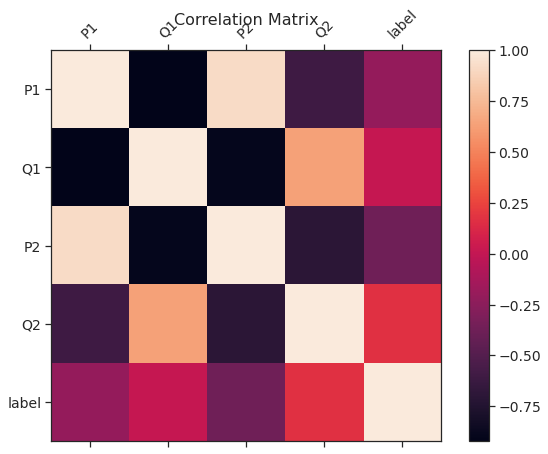

In [11]:
f = plt.figure(figsize=(10, 7))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [12]:
# Convert to numpy - Classification
x_columns = df.columns.drop('label')
x = df[x_columns].values
dummies = pd.get_dummies(df['label']) # Classification
products = dummies.columns
y = dummies.values   

In [13]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.80, random_state=42)

In [14]:
x_train.shape

(270000, 4)

In [15]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'Cumulative explained variance')

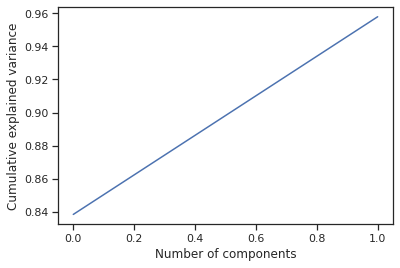

In [16]:
pca = PCA(n_components=2)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(x_train)
X_sc_train = scaler.transform(x_train)
X_sc_test = scaler.transform(x_test)

In [19]:
NCOMPONENTS = 2

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(270000, 4)
(270000, 2)


In [20]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [21]:
X_sc_train.shape

(270000, 4)

In [22]:
X_pca_train.shape

(270000, 2)

In [25]:
model = Sequential()
layers = 3
units = 369

model.add(Dense(units, input_dim=2, activation='relu'))
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
tf.keras.callbacks.History()

model.fit(X_pca_train, y_train, epochs=30, batch_size=1000, validation_split=0.15, verbose=2)

Epoch 1/30
230/230 - 2s - loss: 1.6726 - accuracy: 0.4193 - val_loss: 1.2015 - val_accuracy: 0.3865 - 2s/epoch - 8ms/step
Epoch 2/30
230/230 - 1s - loss: 0.6618 - accuracy: 0.6883 - val_loss: 0.9480 - val_accuracy: 0.5167 - 967ms/epoch - 4ms/step
Epoch 3/30
230/230 - 1s - loss: 0.4764 - accuracy: 0.7855 - val_loss: 0.7620 - val_accuracy: 0.6261 - 891ms/epoch - 4ms/step
Epoch 4/30
230/230 - 1s - loss: 0.3761 - accuracy: 0.8380 - val_loss: 0.7032 - val_accuracy: 0.6534 - 958ms/epoch - 4ms/step
Epoch 5/30
230/230 - 1s - loss: 0.3104 - accuracy: 0.8700 - val_loss: 0.7667 - val_accuracy: 0.6681 - 884ms/epoch - 4ms/step
Epoch 6/30
230/230 - 1s - loss: 0.2661 - accuracy: 0.8918 - val_loss: 0.4681 - val_accuracy: 0.7878 - 875ms/epoch - 4ms/step
Epoch 7/30
230/230 - 1s - loss: 0.2326 - accuracy: 0.9070 - val_loss: 0.5131 - val_accuracy: 0.7617 - 914ms/epoch - 4ms/step
Epoch 8/30
230/230 - 1s - loss: 0.2092 - accuracy: 0.9169 - val_loss: 0.5889 - val_accuracy: 0.7777 - 979ms/epoch - 4ms/step
Epo